In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
gyro_file = 'MetaWear_2019-02-17T12.35.30.206_C7CF3D0ED90E_Gyroscope.csv'
accel_file = 'MetaWear_2019-02-17T12.35.30.206_C7CF3D0ED90E_Accelerometer.csv'

In [101]:
def cov_matrix_plot(data, title):
    cov_data = np.corrcoef(data)
    img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
    plt.colorbar(img, ticks=[-1, 0, 1], fraction=0.045)
    plt.title(title + " covariance matrix \n", color='white')

    for x in range(cov_data.shape[0]):
        for y in range(cov_data.shape[1]):
            plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black'
                    , ha='center', va='center')

    plt.show()

In [102]:
def moving_avg(X, N=10, pad_value=0):
    # moving average code: https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
    cumsum, moving_avgs = [0], []
    
    # add zeroes to N-1 items in list
    # so that resulting list is the same shape as the input
    for i in range(0, N-1):
        moving_avgs.append(pad_value)
        
    for i, x in enumerate(X, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_avg = (cumsum[i] - cumsum[i-N])/N
            moving_avgs.append(moving_avg)
            
    return moving_avgs

In [103]:
gyro_df = pd.read_csv('C:/Users/Nate/Downloads/' + gyro_file)
accel_df = pd.read_csv('C:/Users/Nate/Downloads/' + accel_file)

In [90]:
# cleanse gyro_df by removing first and last 3 seconds
# gyro_df = gyro_df[ (gyro_df['elapsed (s)'] > 3) & (gyro_df['elapsed (s)'] < gyro_df['elapsed (s)'].max() - 3)]
# accel_df = accel_df[ (accel_df['elapsed (s)'] > 3) & (accel_df['elapsed (s)'] < accel_df['elapsed (s)'].max() - 3)]

In [104]:
gyro_array = gyro_df.filter(['elapsed (s)', 'x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)']).values.T
accel_array = accel_df.filter(['elapsed (s)', 'x-axis (g)', 'y-axis (g)', 'z-axis (g)']).values.T

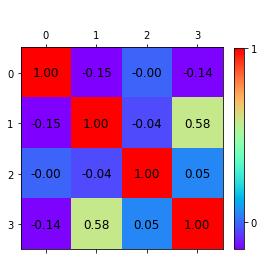

In [105]:
cov_matrix_plot(accel_array, "accelerometer")

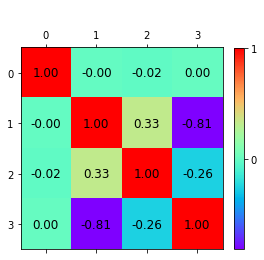

In [106]:
cov_matrix_plot(gyro_array, "gyroscope")

In [107]:
gyro_df['x-axis moving avg 10'] = moving_avg(gyro_df['x-axis (deg/s)'].values, 20)
gyro_df['y-axis moving avg 10'] = moving_avg(gyro_df['y-axis (deg/s)'].values, 20)
gyro_df['z-axis moving avg 10'] = moving_avg(gyro_df['z-axis (deg/s)'].values, 20)

C:\Users\Nate\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


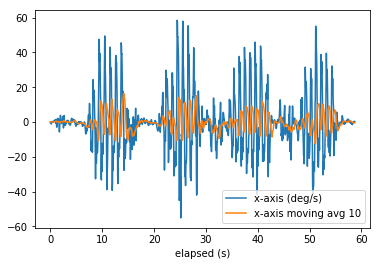

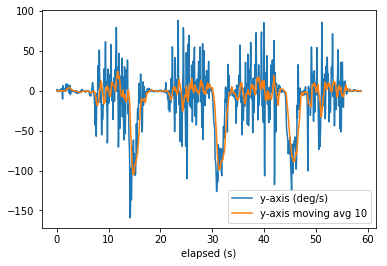

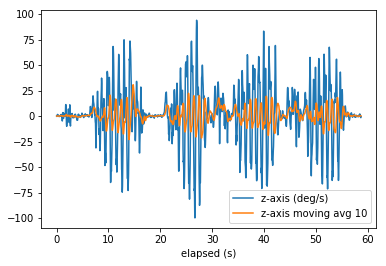

In [108]:
gyro_df.plot(x='elapsed (s)', y=['x-axis (deg/s)', 'x-axis moving avg 10'])
gyro_df.plot(x='elapsed (s)', y=['y-axis (deg/s)', 'y-axis moving avg 10'])
gyro_df.plot(x='elapsed (s)', y=['z-axis (deg/s)', 'z-axis moving avg 10'])

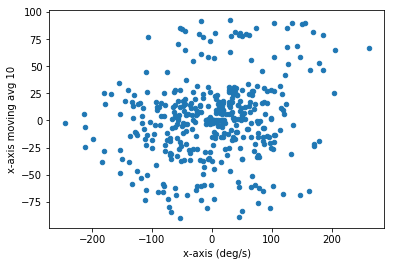

In [89]:
gyro_df.plot(x='x-axis (deg/s)', y='x-axis moving avg 10', kind='scatter')
#gyro_df.plot(x='x-axis (deg/s)', y='z-axis (deg/s)', kind='scatter')
#gyro_df.plot(x='y-axis (deg/s)', y='y-axis (deg/s)', kind='scatter')

In [109]:
accel_df['x-axis moving avg 10'] = moving_avg(accel_df['x-axis (g)'].values, 20)
accel_df['y-axis moving avg 10'] = moving_avg(accel_df['y-axis (g)'].values, 20)
accel_df['z-axis moving avg 10'] = moving_avg(accel_df['z-axis (g)'].values, 20)

In [178]:
accel_df_0_10 = accel_df[(accel_df['elapsed (s)'] >= 50) & (accel_df['elapsed (s)'] < 60)]

C:\Users\Nate\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


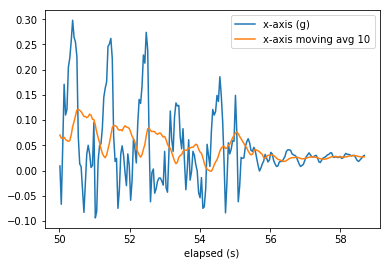

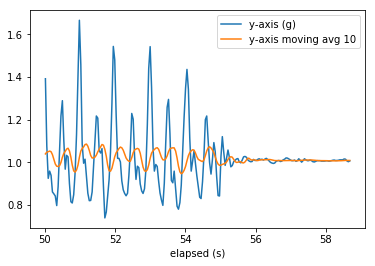

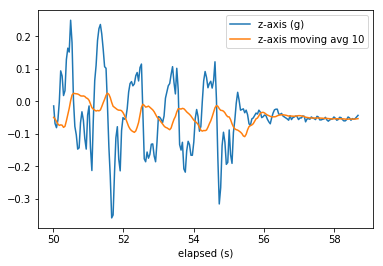

In [179]:
accel_df_0_10.plot(x='elapsed (s)', y=['x-axis (g)', 'x-axis moving avg 10'])
accel_df_0_10.plot(x='elapsed (s)', y=['y-axis (g)', 'y-axis moving avg 10'])
accel_df_0_10.plot(x='elapsed (s)', y=['z-axis (g)', 'z-axis moving avg 10'])

In [121]:
one_second_test = accel_df[(accel_df['elapsed (s)'] >= 1) & (accel_df['elapsed (s)'] < 2)]

In [122]:
np.std(one_second_test['x-axis (g)'])

0.02688047618625831

In [123]:
accel_df['elapsed (s)'].max()

58.681999999999995

In [185]:
accel_df[(accel_df['elapsed (s)'] >= 10) & (accel_df['elapsed (s)'] < 11)].shape

(24, 9)

In [212]:
accel_stats = []

for sec in range(7, int(accel_df['elapsed (s)'].max())):
    df = accel_df[(accel_df['elapsed (s)'] >= sec-1) & (accel_df['elapsed (s)'] < sec)]
    accel_stats.append([sec, 
                          
      # x-axis stats
      np.std(df['x-axis (g)']), np.max(df['x-axis (g)']), np.min(df['x-axis (g)']),
      np.mean(df['x-axis (g)']), np.ptp(df['x-axis (g)']), np.median(df['x-axis (g)']),       
                          
      # y-axis stats
      np.std(df['y-axis (g)']), np.max(df['y-axis (g)']), np.min(df['y-axis (g)']),
      np.mean(df['y-axis (g)']), np.ptp(df['y-axis (g)']), np.median(df['y-axis (g)']),  
                          
      # z-axis stats
      np.std(df['z-axis (g)']), np.max(df['z-axis (g)']), np.min(df['z-axis (g)']),
      np.mean(df['z-axis (g)']), np.ptp(df['z-axis (g)']), np.median(df['z-axis (g)'])                         
                         ])
    
accel_stats_arr = np.asarray(accel_stats)

In [236]:
# actual classifications starting at second 5
actions = [
    ['stand'],
    ['stand'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['turn around'],
    ['turn around'],
    ['stand'],
    ['stand'],
    ['stand'],
    ['stand'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['stand'],
    ['turn around'],
    ['turn around'],
    ['turn around'],
    ['stand'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['stand'],
    ['turn around'],
    ['turn around'],
    ['turn around'],
    ['stand'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk'],
    ['walk']
]

In [237]:
accel_stats_arr.shape

(51, 19)

In [383]:
# change actions to values
action_values = []
for a in actions:
    if a==['stand']:
        action_values.append([0])
    elif a==['walk']:
        action_values.append([1])
    elif a==['turn around']:
        action_values.append([2])
    #print(action_values)
        
actions_arr = np.asarray(action_values)

In [385]:
actions_arr = np.asarray(action_values)
actions_arr

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [386]:
accel_stats_actions = np.hstack((accel_stats_arr, actions_arr))

In [387]:
X = accel_stats_actions[:,2:19].astype(np.float16)
Y = accel_stats_actions[:,19:20] #.astype(np.str)

In [409]:
# used to split datasets for machine learning
# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.cross_validation import train_test_split 

# The MSE is a measure of the quality of an estimator
# https://en.wikipedia.org/wiki/Mean_squared_error
from sklearn.metrics import mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [410]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=15)

In [411]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [412]:
# build KNN Regressor model here
regressor.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')

In [413]:
Y_est = regressor.predict(X_test)

In [414]:
mean_squared_error(Y_test, Y_est)

0.30383838383838385

In [415]:
Y_test

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [416]:
Y_test

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [380]:
iris = datasets.load_iris()

In [417]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==